---
---
Granovetter's (1978) threshold model 
---
---

The following code implements the cobweb diagram of Granovetter's (1978) threshold model 

Replication using the R language By Yen-Sheng Chiang and James Kitts, 2005

Replication using the Python language By Cheng-Jun Wang, 2020

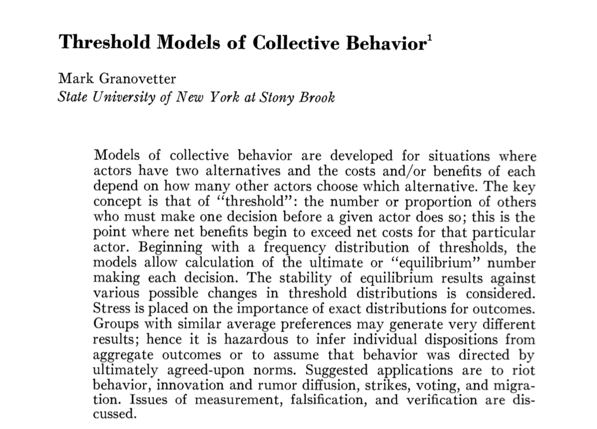

- Thresholds  $x$
- Frequency distribution $f(x)$
- The cumulative distribution function (CDF) $F(x)$

Denote the proportion of the population who have joined a riot by time $t$ as $r(t)$.

Those whose threshold smaller than $r(t)$ will join in the riot at time $t+1$, therefore:

$$r(t+1) = F(r(t))$$

Setting $r(t+1) = r(t)$, the equlibirium outcome may be found.





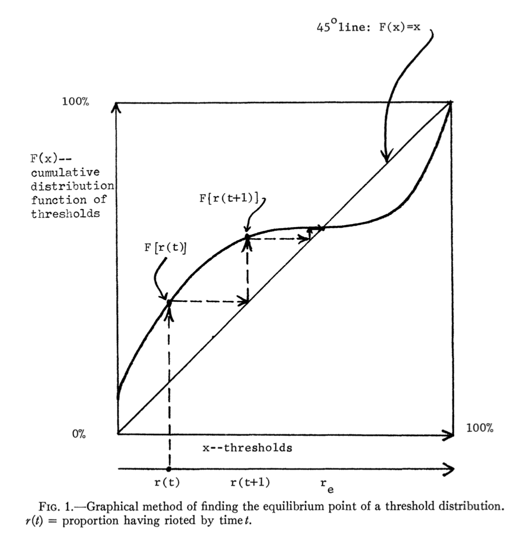

In [22]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [23]:
# SETTINGS HERE
Mean		    = 0.25	# the mean of the (normal) distribution of thresholds	
Standard_Deviation  = 0.15	# the standard deviation of the normal distribution
Starting_Point	    = 0.13	# the starting point of the cobweb diagram 
Max_Iterations	    = 30      	# the number of iterations for the cobweb diagram 

```R
X = seq(from=0,to=1,length=100)  # 100x1 linearly-spaced vector in [0,1]
Z = pnorm(X, Mean, Standard_Deviation)  # defines Normal (mu, sd) c.d.f
plot(X,Z)
```

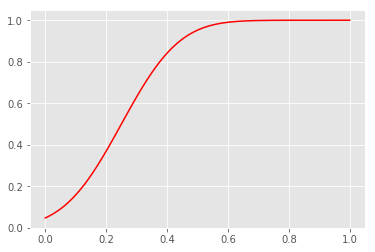

In [24]:
X = np.linspace(0, 1, 100) # 100x1 linearly-spaced vector in [0,1]
Z = norm.cdf(X, Mean, Standard_Deviation)
plt.plot(X, Z, 'r-')
plt.show()

```R
X_List=Starting_Point	# prepare a list to collect the x-coordinate data 
Y_List=0		# prepare a list to collect the y-coordinate data 
x_point=Starting_Point  # the x coordinate of the second point is the same as the starting point 
```

In [25]:
X_List=[] # prepare a list to collect the x-coordinate data 
Y_List=[] # prepare a list to collect the y-coordinate data 
x_point=Starting_Point  # the x coordinate of the second point is the same as the starting point 

```R
# -- Loop over Iterations to Get the Cobweb Diagram -- #
for (i in 1 : Max_Iterations) {
y_point=pnorm(x_point, Mean, Standard_Deviation)     # get the corresponding normal c.d.f
X_List=c(X_List, x_point)	# record the x coordinate
Y_List=c(Y_List, y_point)	# record the y coordinate
X_List=c(X_List, y_point)	# the x coordinate of the point on 45 degree line
Y_List=c(Y_List, y_point)	# the y coordinate of the point on 45 degree line
x_point=y_point
}
```

In [26]:
for i in range(Max_Iterations):
    y_point = norm.cdf(x_point, Mean, Standard_Deviation)
    X_List.append(x_point) # record the x coordinate
    X_List.append(y_point) # the x coordinate of the point on 45 degree line
    Y_List.append(y_point) # record the y coordinate
    Y_List.append(y_point) # the y coordinate of the point on 45 degree line
    x_point = y_point

```R
# -- Plot the Diagram -- #
ymin = min(min(X), min(Z)) 	# get lower boundary of data
ymax = max(max(X), max(Z))	# set upper boundary of data
plot(X,Z,type = 'b',col="blue", 
     xlab="Proportion of agents rioting (r)",
     ylab="Proportion of agents willing to riot (given r)",
     ylim=c(ymin,ymax)) 

lines(X,X, type='b',col="black")          # plot 45 degree line
lines(X_List,Y_List, type='l',col="red")  # plot the cobweb diagram        	              
legend(0, 1, legend=c("Normal c.d.f=blue","Cobweb=red","45 degree line=black"))
```

In [27]:
ymin = min(min(X), min(Z))
ymax = max(max(X), max(Z)) 

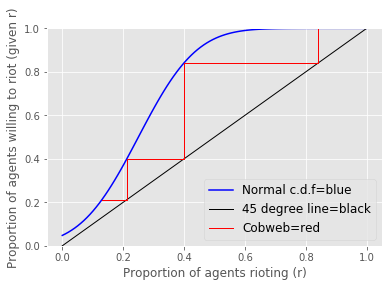

In [28]:
plt.plot(X,Z,'b-', label = "Normal c.d.f=blue")
plt.xlabel("Proportion of agents rioting (r)")
plt.ylabel("Proportion of agents willing to riot (given r)")
plt.ylim([ymin,ymax])
plt.plot(X,X, color='black', linestyle='-',linewidth=1, 
         label = "45 degree line=black")# plot 45 degree line
plt.plot(X_List,Y_List, linestyle='-',linewidth=1,
         color="red", label = "Cobweb=red")  # plot the cobweb diagram                          
plt.legend(fontsize = 12)
plt.show()

In [29]:
def plot_threshold_model(Mean, Standard_Deviation, Starting_Point, Max_Iterations):
    # SETTINGS HERE
    # Mean		    = 0.25	# the mean of the (normal) distribution of thresholds	
    # Standard_Deviation  = 0.15	# the standard deviation of the normal distribution
    # Starting_Point	    = 0.13	# the starting point of the cobweb diagram 
    # Max_Iterations	    = 30      	# the number of iterations for the cobweb diagram 
    X = np.linspace(0, 1, 100) # 100x1 linearly-spaced vector in [0,1]
    Z = norm.cdf(X, Mean, Standard_Deviation)
    X_List=[] # prepare a list to collect the x-coordinate data 
    Y_List=[] # prepare a list to collect the y-coordinate data 
    x_point=Starting_Point  # the x coordinate of the second point is the same as the starting point 
    for i in range(Max_Iterations):
        y_point = norm.cdf(x_point, Mean, Standard_Deviation)
        X_List.append(x_point) # record the x coordinate
        X_List.append(y_point) # the x coordinate of the point on 45 degree line
        Y_List.append(y_point) # record the y coordinate
        Y_List.append(y_point) # the y coordinate of the point on 45 degree line
        x_point = y_point
    plt.plot(X,Z,'b-', label = "Normal c.d.f=blue")
    plt.xlabel("Proportion of agents rioting (r)")
    plt.ylabel("Proportion of agents willing to riot (given r)")
    plt.ylim([ymin,ymax])
    plt.plot(X,X, color='black', linestyle='-',linewidth=1, 
             label = "45 degree line=black")# plot 45 degree line
    plt.plot(X_List,Y_List, linestyle='-',linewidth=1,
             color="red", label = "Cobweb=red")  # plot the cobweb diagram                          
    plt.legend(fontsize = 12)
    plt.show()

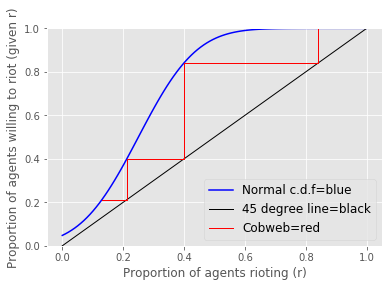

In [30]:
plot_threshold_model(0.25, 0.15, 0.13, 30)

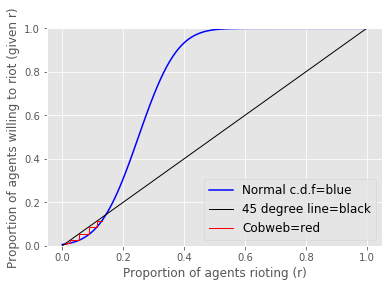

In [31]:
plot_threshold_model(0.25, 0.1, 0.13, 30)

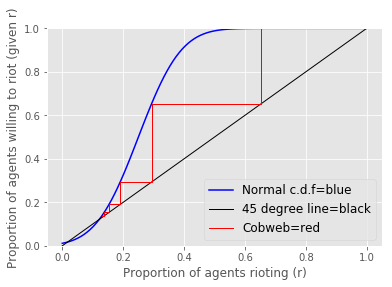

In [32]:
plot_threshold_model(0.25, 0.11, 0.13, 30)

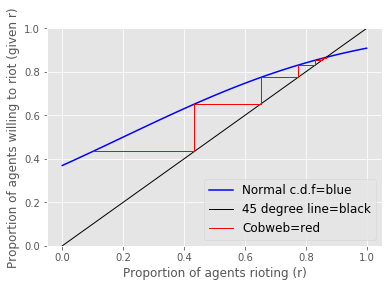

In [33]:
plot_threshold_model(0.2, 0.6, 0.10, 30)

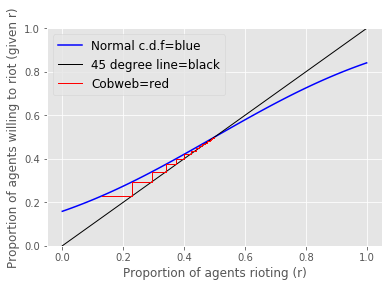

In [34]:
plot_threshold_model(0.5, 0.5, 0.13, 30)

## Power Law Distribution

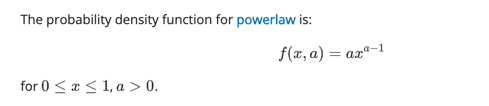

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.powerlaw.html#scipy.stats.powerlaw

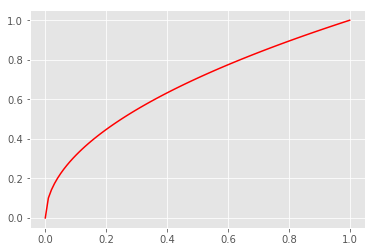

In [35]:
from scipy.stats import powerlaw

X = np.linspace(0, 1, 100) # 100x1 linearly-spaced vector in [0,1]
a = 0.5
Z = powerlaw.cdf(X, a)
plt.plot(X, Z, 'r-')
# plt.xscale('log')
# plt.yscale('log')
plt.show()


In [36]:
def plot_threshold_model_powerlaw(a, Starting_Point, Max_Iterations):
    from scipy.stats import powerlaw
    # SETTINGS HERE
    # Mean		    = 0.25	# the mean of the (normal) distribution of thresholds	
    # Standard_Deviation  = 0.15	# the standard deviation of the normal distribution
    # Starting_Point	    = 0.13	# the starting point of the cobweb diagram 
    # Max_Iterations	    = 30      	# the number of iterations for the cobweb diagram 
    X = np.linspace(0, 1, 100) # 100x1 linearly-spaced vector in [0,1]
    Z = powerlaw.cdf(X, a)
    X_List=[] # prepare a list to collect the x-coordinate data 
    Y_List=[] # prepare a list to collect the y-coordinate data 
    x_point=Starting_Point  # the x coordinate of the second point is the same as the starting point 
    for i in range(Max_Iterations):
        y_point = powerlaw.cdf(x_point, a)
        X_List.append(x_point) # record the x coordinate
        X_List.append(y_point) # the x coordinate of the point on 45 degree line
        Y_List.append(y_point) # record the y coordinate
        Y_List.append(y_point) # the y coordinate of the point on 45 degree line
        x_point = y_point
    plt.plot(X,Z,'b-', label = "Powerlaw c.d.f=blue")
    plt.xlabel("Proportion of agents rioting (r)")
    plt.ylabel("Proportion of agents willing to riot (given r)")
    plt.ylim([ymin,ymax])
    plt.plot(X,X, color='black', linestyle='-',linewidth=1, 
             label = "45 degree line=black")# plot 45 degree line
    plt.plot(X_List,Y_List, linestyle='-',linewidth=1,
             color="red", label = "Cobweb=red")  # plot the cobweb diagram                          
    plt.legend(fontsize = 12)
    plt.show()

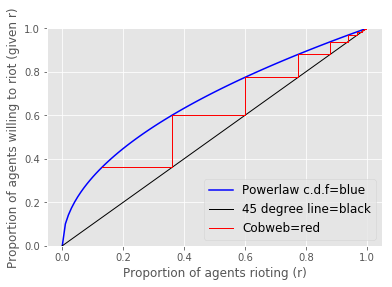

In [37]:
plot_threshold_model_powerlaw(0.5, 0.13, 30)

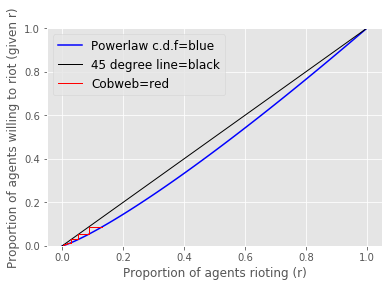

In [38]:
plot_threshold_model_powerlaw(1.2, 0.13, 30)

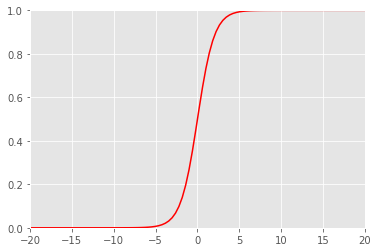

In [39]:
from scipy.stats import logistic
import numpy as np

X = np.linspace(-20, 20, 100) # 100x1 linearly-spaced vector in [0,1]
Z = logistic.cdf(X)
plt.plot(X, Z, 'r-')
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(-20,20)
plt.ylim(0,1)
plt.show()

In [40]:
def plot_threshold_model_logistic(Starting_Point, Max_Iterations):
    from scipy.stats import logistic
    # SETTINGS HERE
    # Mean		    = 0.25	# the mean of the (normal) distribution of thresholds	
    # Standard_Deviation  = 0.15	# the standard deviation of the normal distribution
    # Starting_Point	    = 0.13	# the starting point of the cobweb diagram 
    # Max_Iterations	    = 30      	# the number of iterations for the cobweb diagram 
    X = np.linspace(0, 1, 100) # 100x1 linearly-spaced vector in [0,1]
    Z = logistic.cdf(X)
    X_List=[] # prepare a list to collect the x-coordinate data 
    Y_List=[] # prepare a list to collect the y-coordinate data 
    x_point=Starting_Point  # the x coordinate of the second point is the same as the starting point 
    for i in range(Max_Iterations):
        y_point = logistic.cdf(x_point)
        X_List.append(x_point) # record the x coordinate
        X_List.append(y_point) # the x coordinate of the point on 45 degree line
        Y_List.append(y_point) # record the y coordinate
        Y_List.append(y_point) # the y coordinate of the point on 45 degree line
        x_point = y_point
    plt.plot(X,Z,'b-', label = "Pareto c.d.f=blue")
    plt.xlabel("Proportion of agents rioting (r)")
    plt.ylabel("Proportion of agents willing to riot (given r)")
    plt.ylim([ymin,ymax])
    plt.plot(X,X, color='black', linestyle='-',linewidth=1, 
             label = "45 degree line=black")# plot 45 degree line
    plt.plot(X_List,Y_List, linestyle='-',linewidth=1,
             color="red", label = "Cobweb=red")  # plot the cobweb diagram                          
    plt.legend(fontsize = 12)
    plt.show()

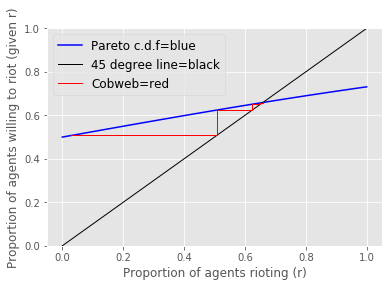

In [41]:
plot_threshold_model_logistic(0.03, 30)